In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [1]:
import scanpy as sc
import pandas as pd
import scanpy as sc 
import sys 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


warnings.filterwarnings('ignore')
sys.path.append('../../src')

from spaceoracle.virtual_tissue import VirtualTissue

In [3]:
plt.rcParams.update({
    "text.usetex": False,
    "svg.fonttype": 'none'
})

In [4]:
adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/slideseq_mouse_lymphnode.h5ad')
# adata = sc.read_h5ad('/Users/koush/Desktop/training_data/slideseq_mouse_lymphnode.h5ad')

In [5]:
# adata = adata[adata.obs.cell_type != 'DC']
annotated_zones = pd.read_csv('/ix/djishnu/alw399/SpaceOracle/notebooks/mouse_lymphnode_slideseq/banksy_annotated_zones.csv', index_col=0)
adata.obs['banksy_zone'] = annotated_zones.loc[adata.obs.index, 'banksy_cluster'].values

In [6]:
%matplotlib inline

In [7]:
import json

with open('./colors.json', 'r') as f:
    color_dict = json.load(f)

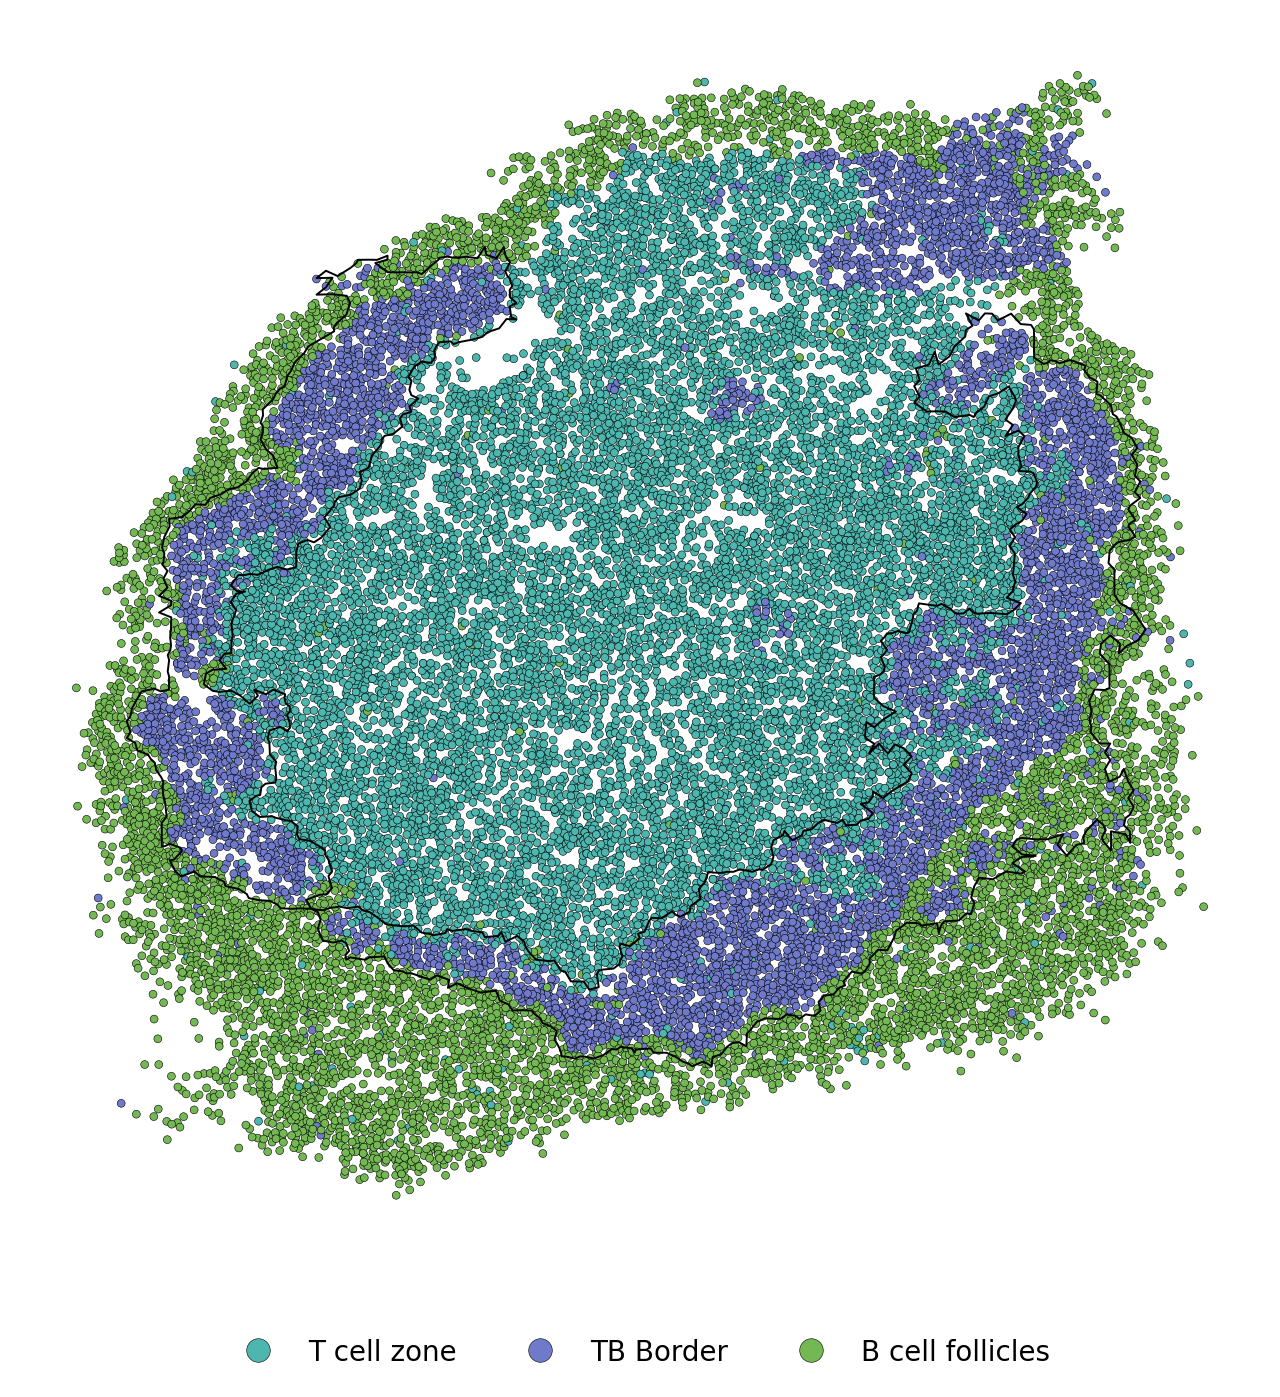

In [8]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['figure.dpi'] = 100


import alphashape

ct_points_wt = {}
for ct in adata.obs['banksy_zone'].unique():
    points = np.asarray(
        adata[adata.obs['banksy_zone'] == ct].obsm['spatial'])
    delta = 30
    points = np.vstack(
        (points +[-delta,delta], points +[-delta,-delta], 
        points +[delta,delta], points +[delta,-delta]))
    ct_points_wt[ct] = points

adatax = adata

sns.scatterplot(data=adatax.obs, 
    x=adatax.obsm['spatial'][:,0], 
    y=adatax.obsm['spatial'][:,1],
    s=8,
    edgecolor='black',
    linewidth=0.2,
    hue='banksy_zone',
    legend='brief', palette=color_dict)
plt.axis('off')

alpha_shape = alphashape.alphashape(ct_points_wt['TB Border'], alpha=0.038)
for geom in alpha_shape.geoms:
    if geom.area > 800000:
        plt.plot(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color='black', alpha=1, linewidth=0.7)
        
plt.legend(bbox_to_anchor=(0.5, -0.05), 
    loc='upper center', ncol=4, frameon=False, 
    markerscale=3, fontsize=10)

plt.savefig('./figures/spatial_celltypes.svg', dpi=300, bbox_inches='tight', format='svg')
plt.show()

In [8]:
# sc.pl.dotplot(adata, 
#     var_names=['Ccr4', 'Foxp3', 'Il2ra', 'Cd8a', 'Cd4'], 
#     groupby='cell_type', layer='normalized_count', cmap='Greens', show=False)

# plt.show()

In [9]:
tonsil = VirtualTissue(
    adata = adata,
    annot = 'cell_type',
    betadatas_path = '/Volumes/SSD/lasso_runs/slideseq_mouse_lymphnode',
    ko_path = '/Volumes/SSD/genome_screens/slideseq_mouse_lymphnode',
    color_dict=color_dict
)

# rename={
#     'T_follicular_helper': 'T Follicular\nHelper',
#     'T_CD8': 'T CD8+',
#     'T_CD4': 'T CD4+',
#     'B_germinal_center': 'B Germinal\nCenter',
#     'B_naive': 'B\nNaive',
#     'B_memory': 'B\nMemory',
# }

In [9]:
ligands = ['Il2', 'Il15', 'Il4', 'Cxcl13', 'Ccl5', 'Lgals9']
receptors = ['Il2ra', 'Cxcr4', 'Ccr4', 'Il4ra', 'Il6st', 'Cxcr5']
tf = ['Gata3', 'Prdm1', 'Pax5', 'Foxp3', 'Bcl6', 'Stat4']
randoms = ['Gata3', 'Cux2', 'Pten', 'Fosl2', 'Zkscan3', 'Tfcp2']

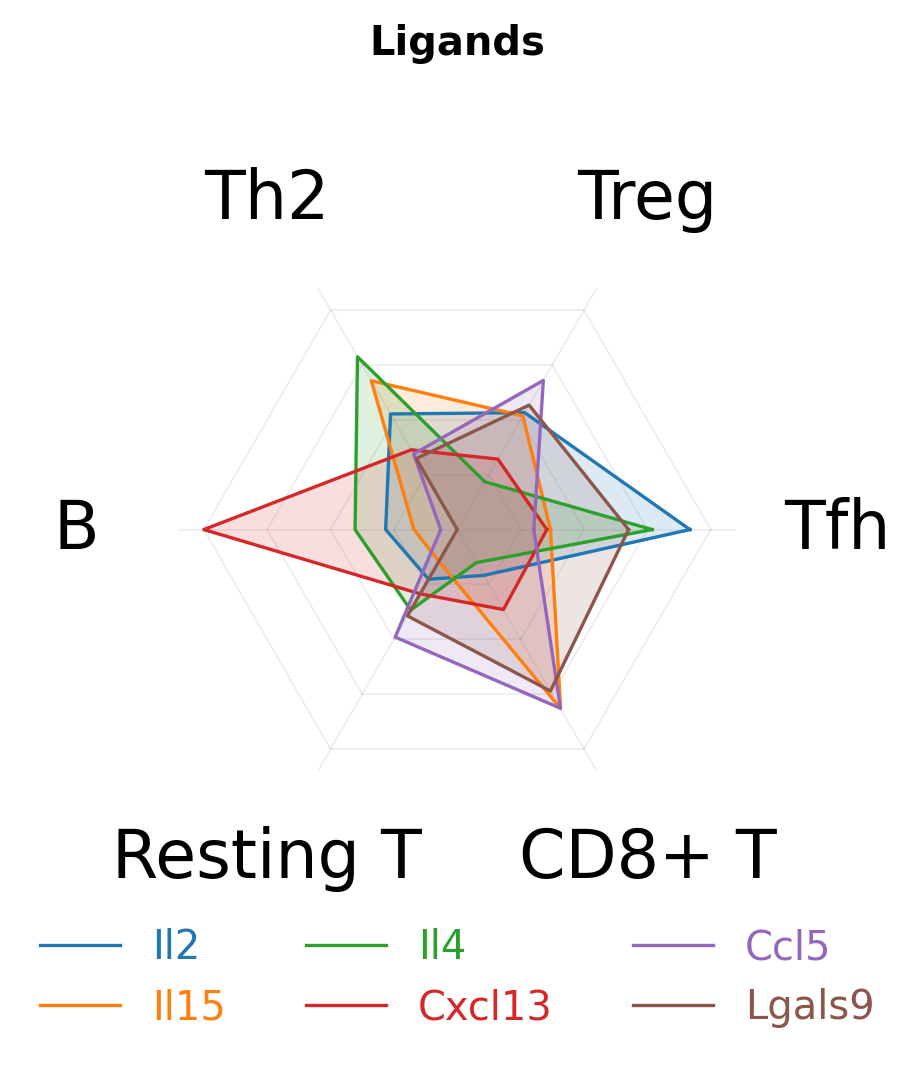

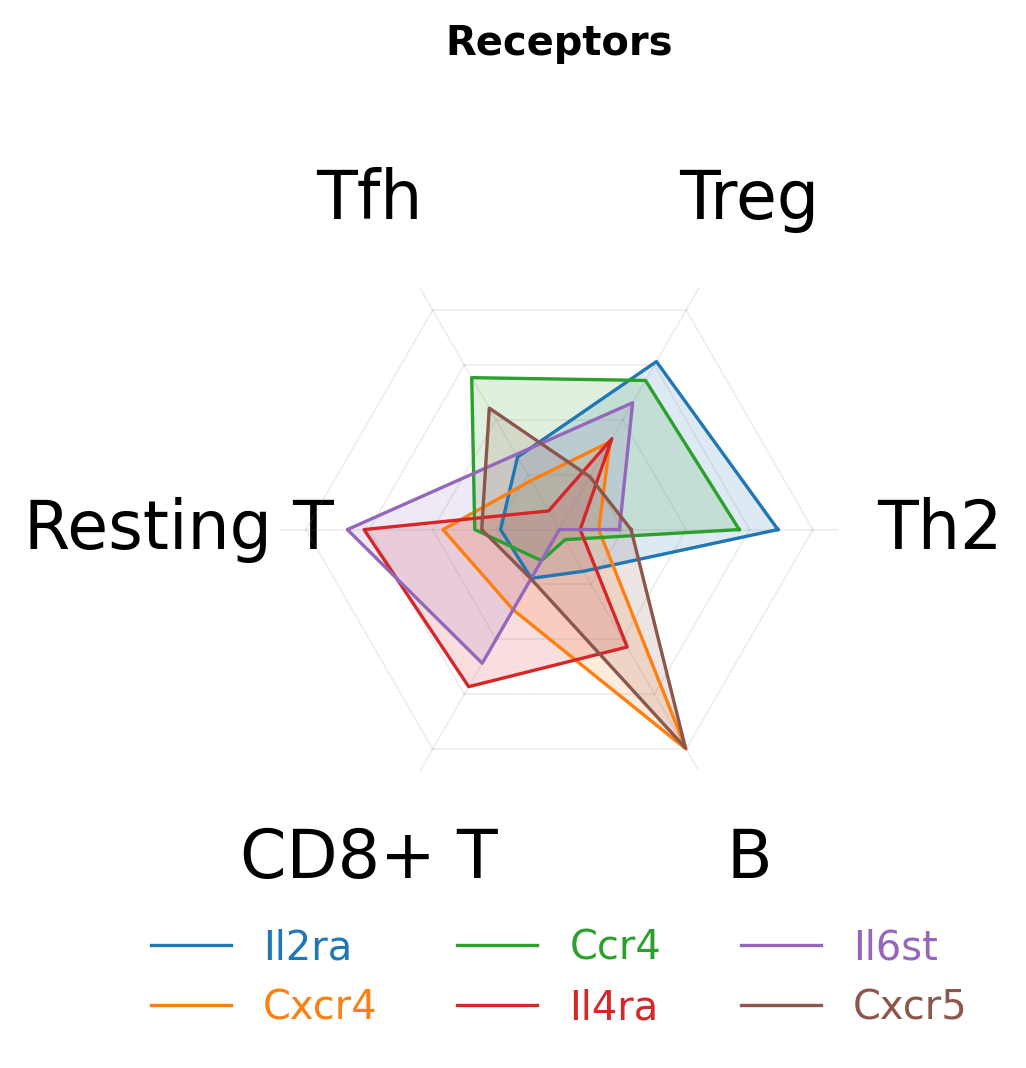

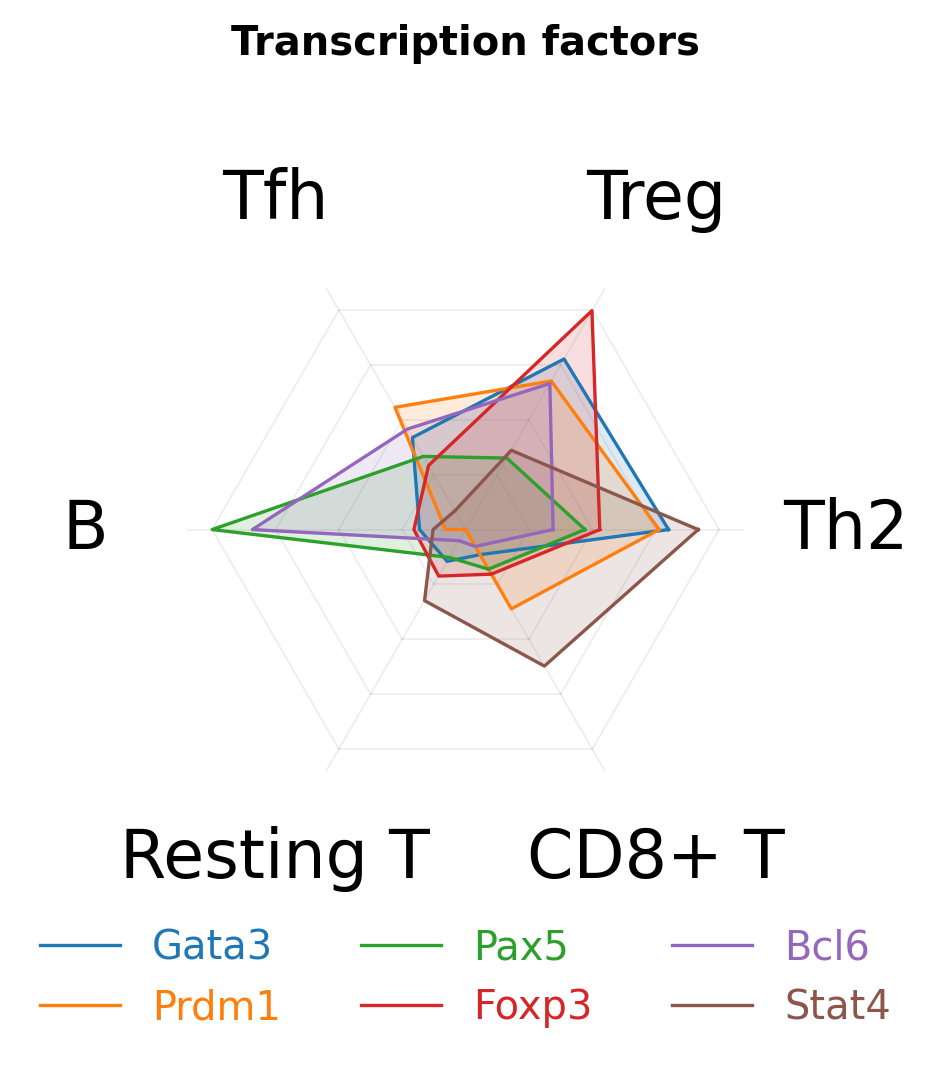

In [14]:

%matplotlib inline
tonsil.plot_radar(genes=ligands, 
    cache_path='../../notebooks/mouse_lymphnode_slideseq/', 
    figsize=(10, 4),
    dpi=120,
)
plt.title('Ligands\n\n', fontweight='bold')
plt.savefig('./figures/spider_plot_ligands.svg', dpi=300, bbox_inches='tight', format='svg')
plt.show()

tonsil.plot_radar(genes=receptors, 
    cache_path='../../notebooks/mouse_lymphnode_slideseq/', 
    figsize=(10, 4),
    dpi=120,
)
plt.title('Receptors\n\n', fontweight='bold')
plt.savefig('./figures/spider_plot_receptors.svg', dpi=300, bbox_inches='tight', format='svg')
plt.show()

tonsil.plot_radar(genes=tf, 
    cache_path='../../notebooks/mouse_lymphnode_slideseq/', 
    figsize=(10, 4),
    dpi=120,
)
plt.title('Transcription factors\n\n', fontweight='bold')
plt.savefig('./figures/spider_plot_tf.svg', dpi=300, bbox_inches='tight', format='svg')
plt.show()

In [9]:
# from spaceoracle.beta import Betabase

# bdb = Betabase(
#     adata, 
#     '/ix/djishnu/shared/djishnu_kor11/lasso_runs/human_tonsil',
#     # tonsil.adata, 
#     # tonsil.betadatas_path, 
#     subsample=None, 
#     float16=True, 
#     obs_names=adata.obs_names,
#     auto_load=False
# )

In [9]:
adata_sc = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/rctd_outputs/mouse_lymphnode_slideseq/zhongli_ref_202401203_mannually_woDoublet.h5ad')

sc.tl.rank_genes_groups(adata_sc, groupby="cell_type", use_raw=False)
markers_df = pd.DataFrame(adata_sc.uns["rank_genes_groups"]["names"]).iloc[0:1000, :]
markers = markers_df['Th2'].tolist()
len(markers)

1000

In [10]:
target_genes = [x for x in markers if x in adata.var_names]
len(target_genes)

228

In [11]:
[x for x in ["Gata3", "Il2ra", "Il4", "Ccr4"] if x in target_genes]

['Gata3', 'Il2ra']

In [12]:
import os 

# target_genes = ["Gata3", "Il2ra", "Stat6", "Il4", "Ccr4", "Pdcd1", "Cxcr5", "Bcl6", "Stat3"]
betadir = '/ix/djishnu/shared/djishnu_kor11/lasso_runs/slideseq_mouse_lymphnode/'

data = {
    gene : pd.read_parquet(betadir + gene + '_betadata.parquet') for gene in target_genes if os.path.exists(betadir + gene + '_betadata.parquet')
}
len(data.keys())

204

In [13]:
interactions = {
    'Th2': {
        gene: data[gene].loc[adata[adata.obs['cell_type'] == 'Th2'].obs.index]
        for gene in data.keys()
    },
    # 'Tfh': {
    #     gene: data[gene].loc[adata[adata.obs['cell_type'] == 'Tfh'].obs.index]
    #     for gene in data.keys()
    # }
}

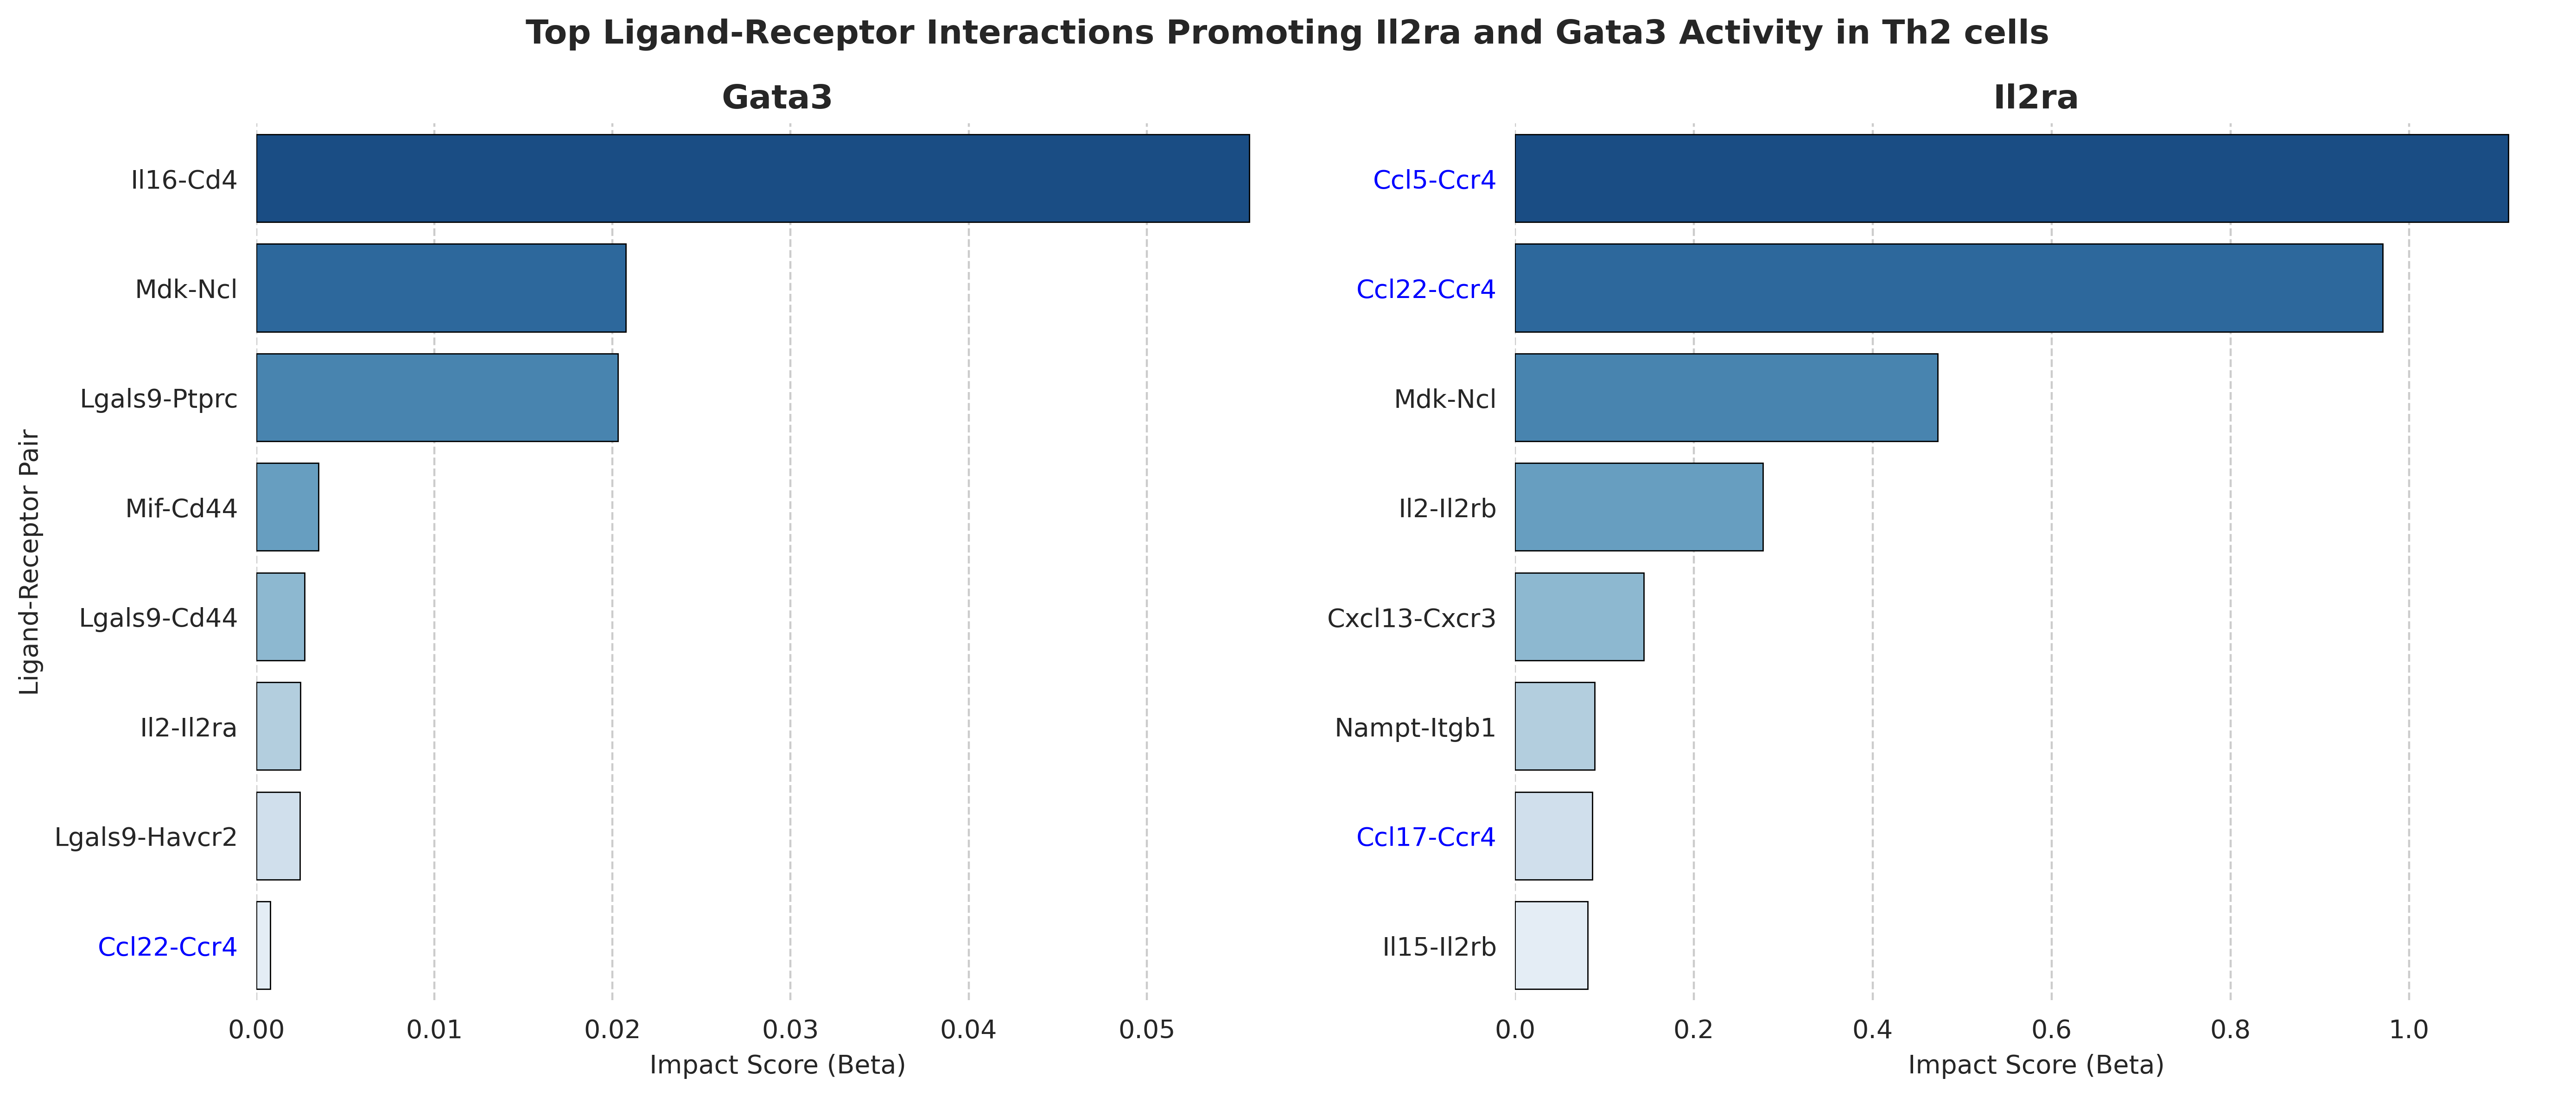

In [15]:
sns.set_style("whitegrid", {'grid.linestyle': '--'}) 

dfr_th2 = pd.concat([interactions['Th2'][gene] for gene in ["Gata3"]], axis=0)
dfr_th2 = dfr_th2.sum(axis=0)
dfr_th2 = dfr_th2.loc[[('$' in x) for x in dfr_th2.index]]
dfr_th2.index = dfr_th2.index.str.replace('beta_', '').str.replace('$', '-')
dfr_th2 = dfr_th2[dfr_th2 > 0].sort_values(ascending=False).head(10)

dfr_tfh = pd.concat([interactions['Th2'][gene] for gene in ["Il2ra"]], axis=0)
dfr_tfh = dfr_tfh.sum(axis=0)
dfr_tfh = dfr_tfh.loc[[('$' in x) for x in dfr_tfh.index]]
dfr_tfh.index = dfr_tfh.index.str.replace('beta_', '').str.replace('$', '-')
dfr_tfh = dfr_tfh[dfr_tfh > 0].sort_values(ascending=False).head(10)

# drop C3 interactions due to overall C3 abundance in tissue
dfr_tfh = dfr_tfh[~dfr_tfh.index.str.contains('C3')]
dfr_th2 = dfr_th2[~dfr_th2.index.str.contains('C3')]

# Setup figure
fig, axes = plt.subplots(1, 2, figsize=(14, max(6, 0.3 * max(len(dfr_th2), len(dfr_tfh)))), dpi=200, sharex=False)

# Barplot for Th2
sns.barplot(
    x=dfr_th2.values, 
    y=dfr_th2.index, 
    ax=axes[0], 
    palette="Blues_r",
    linewidth=0.5,
    edgecolor='black'
)
axes[0].set_title("Gata3", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Impact Score (Beta)")
axes[0].set_ylabel("Ligand-Receptor Pair")

# Barplot for Tfh
sns.barplot(
    x=dfr_tfh.values, 
    y=dfr_tfh.index, 
    ax=axes[1], 
    palette="Blues_r",
    linewidth=0.5,
    edgecolor='black'
)
axes[1].set_title("Il2ra", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Impact Score (Beta)")
axes[1].set_ylabel("")

for ax in axes:
    for spine in ax.spines.values():
        spine.set_visible(False)

# Highlight Ccr4 if present
for ax in axes:
    for i, label in enumerate(ax.get_yticklabels()):
        if 'Ccr4' in label.get_text():
            label.set_color('blue')

plt.suptitle("Top Ligand-Receptor Interactions Promoting Il2ra and Gata3 Activity in Th2 cells", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('figures/mouse_lymph_slideseq_LR_interactions.svg', dpi=300, bbox_inches='tight', transparent=True, format='svg')
plt.show()


In [152]:
# dfr = pd.concat([interactions['Th2'][gene] for gene in ["Il2ra"]], axis=0)
dfr = pd.concat([interactions['Th2'][gene] for gene in set(target_genes) & set(data.keys())], axis=1)
dfr = dfr.groupby(dfr.columns, axis=1).sum()
dfr = dfr[[x for x in dfr.columns if '$' in x]].fillna(0)
receptors = [x.split('$')[1] for x in dfr.columns]
ligands = [x.split('$')[0] for x in dfr.columns]
ligands = [x.replace('beta_', '') for x in ligands]
beta = dfr

th2_expr = adata[dfr.index, receptors].to_df(layer='imputed_count')
th2_expr = np.where(adata.uns['cell_thresholds'].loc[beta.index, receptors] > 0, th2_expr, 0)
env_expr = adata.uns['received_ligands'].loc[dfr.index, ligands]
env_expr = np.where(adata.uns['cell_thresholds'].loc[dfr.index, ligands] > 0, env_expr, 0)

wbetas = beta * th2_expr * env_expr
wbetas.columns = [x.replace('$', '-') for x in wbetas.columns]

In [153]:
wbetas = wbetas[[x for x in wbetas.columns if 'C3' not in x]] # remove C3 because it's everywhere

In [159]:
wbetas.sum().sort_values(ascending=False, key=abs).head(10)

beta_Mif-Cd74       -0.026520
beta_Lgals9-Ighm    -0.018705
beta_Lgals9-Ptprc   -0.003950
beta_Il16-Cd4       -0.000735
beta_Mdk-Ncl         0.000130
beta_Ccl5-Ccr4       0.000109
beta_Ccl22-Ccr4      0.000059
beta_Mif-Cd44        0.000044
beta_Cxcl13-Cxcr3    0.000031
beta_Il2-Il2ra       0.000024
dtype: float64

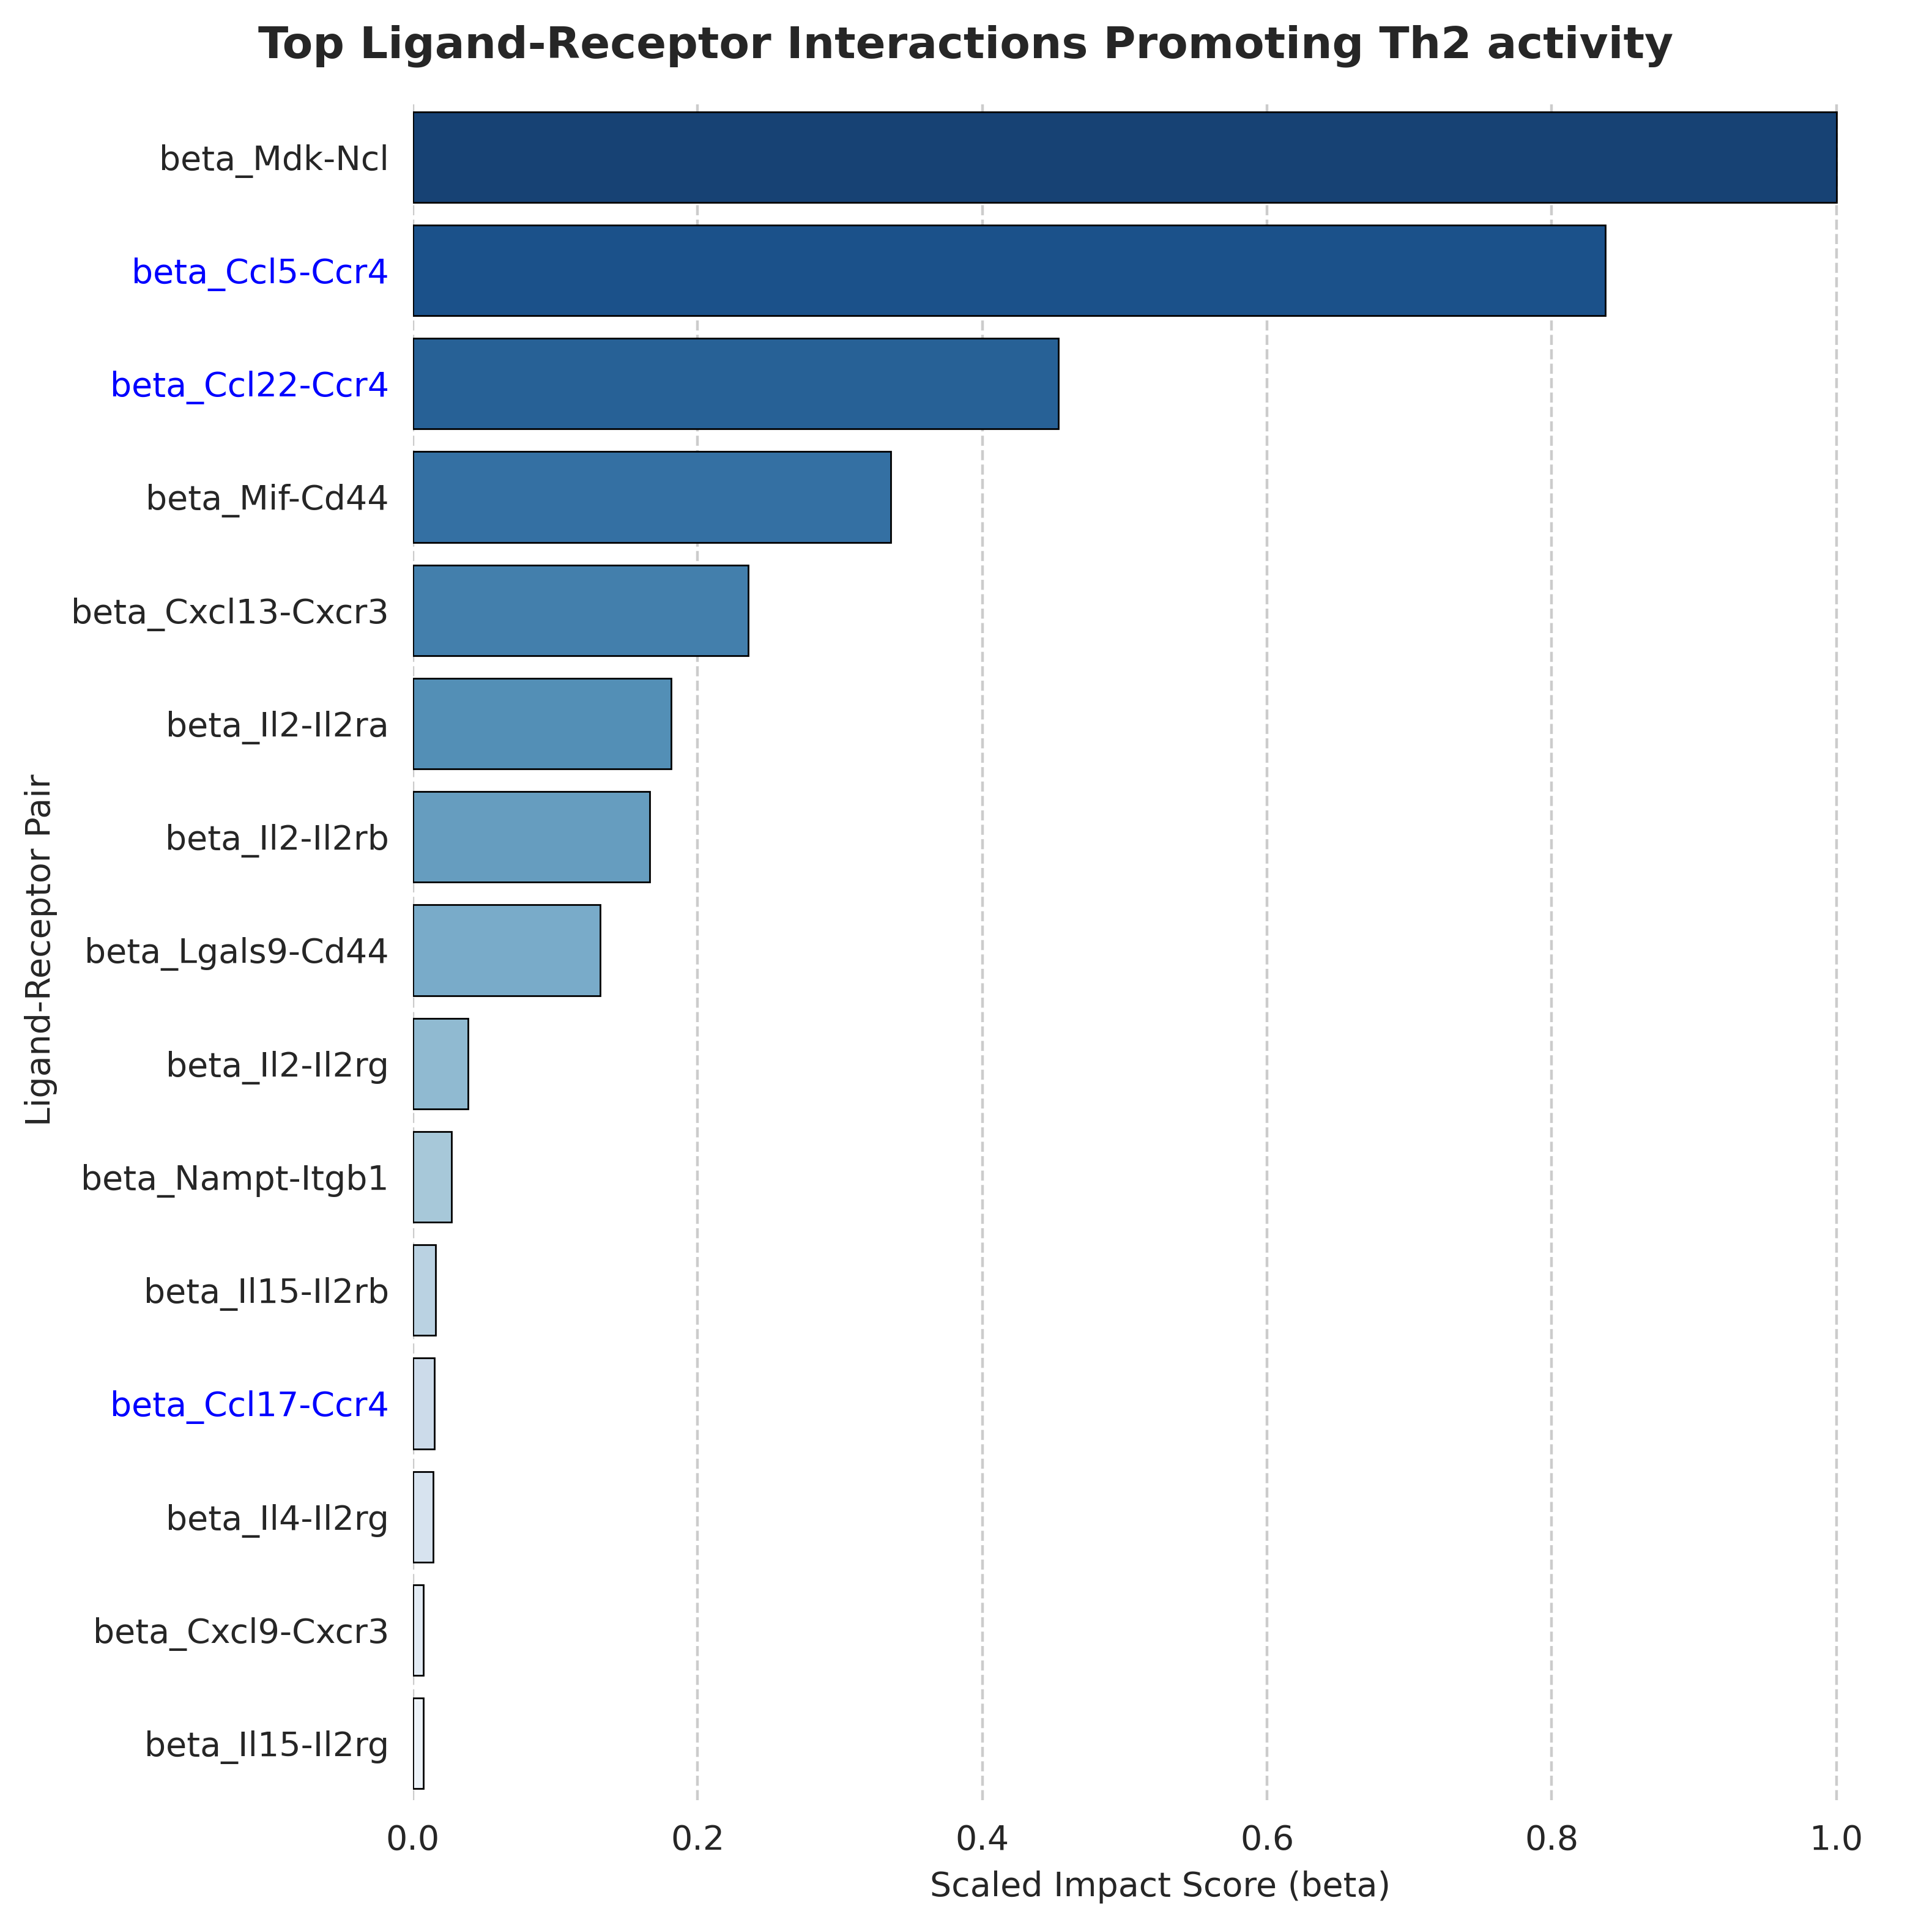

In [165]:
dfr_th2 = wbetas.sum().sort_values(ascending=False).head(15)
dfr_th2 = dfr_th2 / dfr_th2.abs().max()

# Setup figure
fig, ax = plt.subplots(figsize=(8, 8), dpi=200)

# Barplot for Th2
sns.barplot(
    x=dfr_th2.values, 
    y=dfr_th2.index, 
    ax=ax, 
    palette="Blues_r",
    linewidth=0.5,
    edgecolor='black'
)
ax.set_xlabel("Scaled Impact Score (beta)")
ax.set_ylabel("Ligand-Receptor Pair")

for spine in ax.spines.values():
    spine.set_visible(False)

# Highlight Ccr4 if present
for i, label in enumerate(ax.get_yticklabels()):
    if 'Ccr4' in label.get_text():
        label.set_color('blue')

plt.suptitle("Top Ligand-Receptor Interactions Promoting Th2 activity", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('figures/mouse_lymph_slideseq_LR_interactions.svg', dpi=300, bbox_inches='tight', transparent=True, format='svg')
plt.show()

In [172]:
plot_cols = ['Il16-Cd4', 'Ccl5-Ccr4', 'Ccl22-Ccr4']
beta_cols = [f'beta_{x}' for x in plot_cols]

existing_beta_cols = [col for col in beta_cols if col in wbetas.columns]
wbetas_plot = wbetas[existing_beta_cols].copy()
wbetas_plot = wbetas_plot / wbetas_plot.abs().max()

In [175]:
wbetas_plot.loc[:, 'x'] = adata[wbetas.index, :].obsm['spatial'][:, 0]
wbetas_plot.loc[:, 'y'] = adata[wbetas.index, :].obsm['spatial'][:, 1]

wbetas_plot.head(3)

beta_Il16-Cd4  beta_Ccl5-Ccr4  beta_Ccl22-Ccr4            x  \
CTTTACTCAGTCTG      -0.425362        0.014177         0.013126 -1438.949492   
CGGGCCCCAGTTTG      -0.235577        0.017357         0.015139 -1312.856485   
ACACCTCGGTCTAC      -0.349878        0.036561         0.034483 -1384.867643   

                          y  
CTTTACTCAGTCTG  4142.552082  
CGGGCCCCAGTTTG  3869.595502  
ACACCTCGGTCTAC  3796.506626

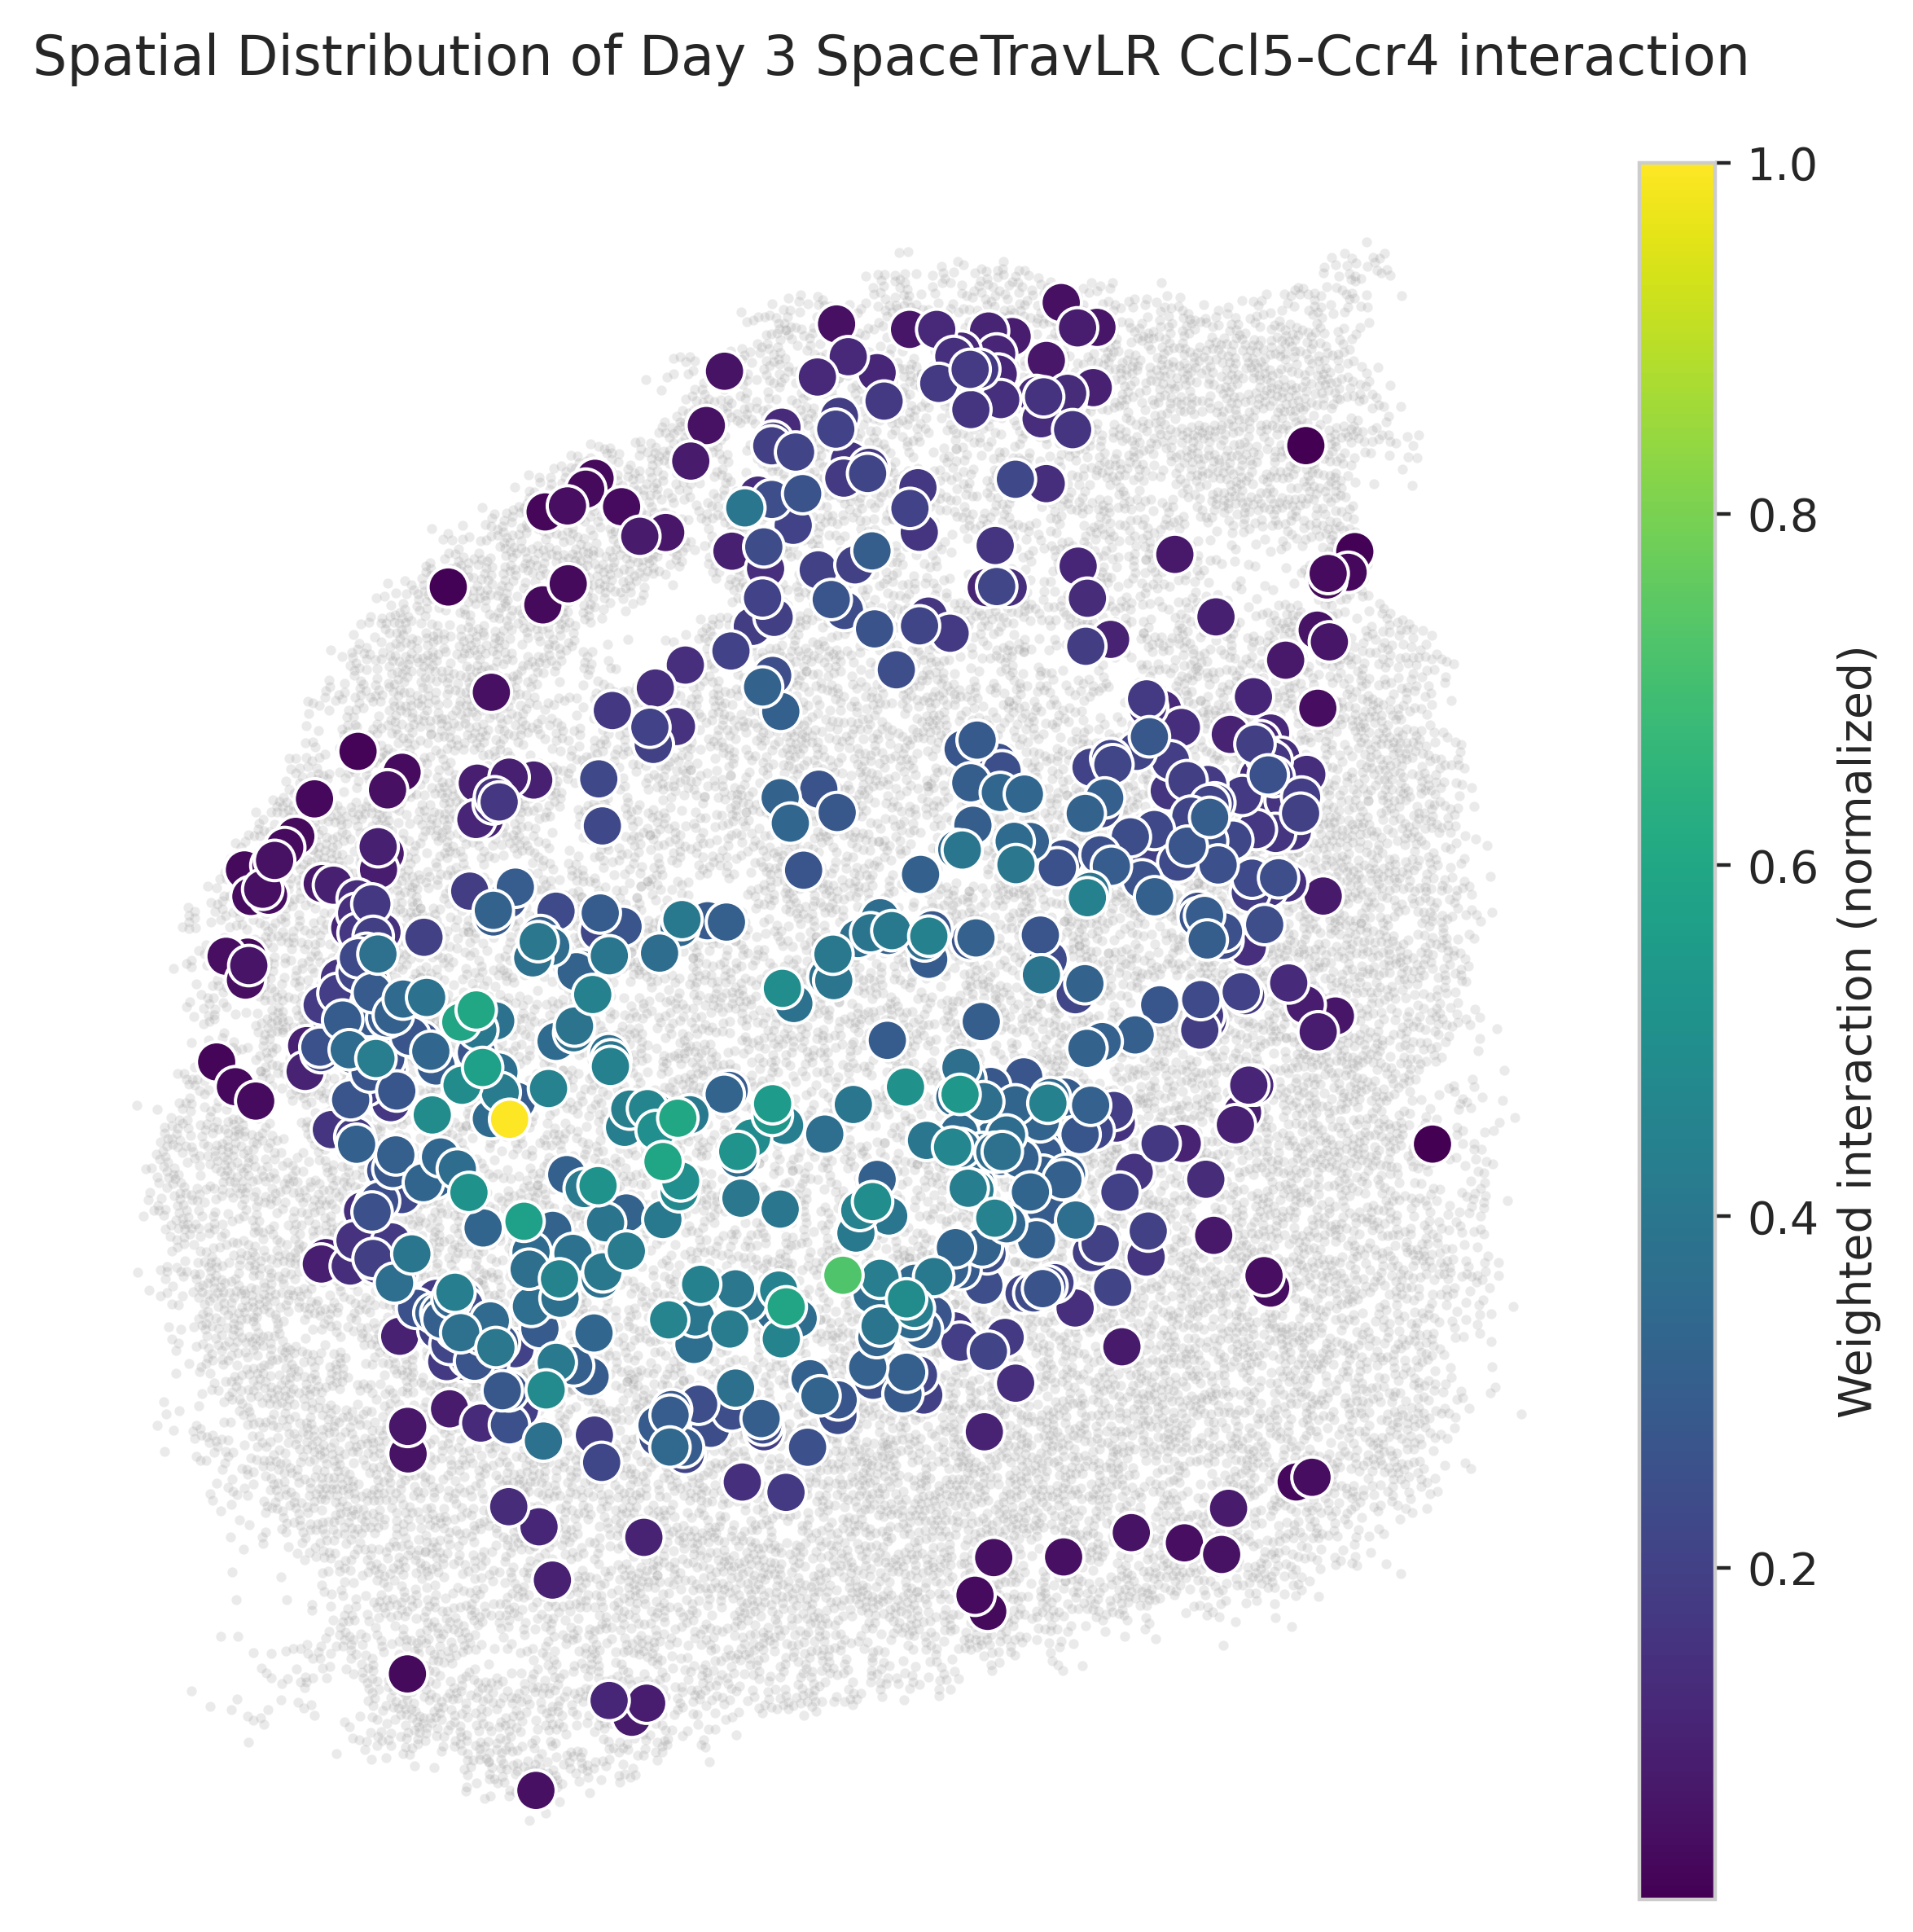

In [177]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Only one plot, so axs is a single Axes, not an array
fig, ax = plt.subplots(figsize=(13, 6), dpi=200)

plot_cols = ['beta_Ccl5-Ccr4']
cmap = 'viridis'

# Compute vmin/vmax only for columns that exist
existing_plot_cols = [hue for hue in plot_cols if hue in wbetas_plot.columns]
if existing_plot_cols:
    vmin = min(wbetas_plot[hue].min() for hue in existing_plot_cols)
    vmax = max(wbetas_plot[hue].max() for hue in existing_plot_cols)
else:
    vmin, vmax = 0, 1  # fallback
norm = plt.Normalize(vmin, vmax)

# Plot background
sns.scatterplot(
    x=adata.obsm['spatial'][:, 0],
    y=adata.obsm['spatial'][:, 1],
    color='gray',
    s=5,
    legend=False,
    ax=ax,
    alpha=0.16,
)

# Plot overlays
for i, hue in enumerate(plot_cols):
    if hue in wbetas_plot.columns:
        plot_data = wbetas_plot.sort_values(by=hue, ascending=True, key=abs)
        sc = sns.scatterplot(
            data=plot_data,
            x='x',
            y='y',
            hue=hue,
            palette=cmap,
            s=80,
            ax=ax,
            legend=False,
            hue_norm=norm,
            alpha=1
        )
        ax.set_aspect('equal')
        ax.set_axis_off()
    else:
        ax.set_visible(False)

# Add colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.15)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.set_label("Weighted interaction (normalized)")

plt.suptitle('Spatial Distribution of Day 3 SpaceTravLR Ccl5-Ccr4 interaction')
plt.tight_layout()
plt.savefig('figures/mouse_lymph_slideseq_Th2_LR_interactions.svg', dpi=300, bbox_inches='tight', transparent=True, format='svg')
plt.show()

In [17]:
adata_1der = sc.read_h5ad('/ix/djishnu/Yijia/project_asthma_lung/1_slide_tcr_seq/data/slideTCR_asthma_lymphnode_tangramAnno_wTCR_wRegion_w1DERCT_sample1_test.h5ad')
transferred = adata_1der[adata_1der.obs['1DER'] == True].obs_names

adata.obs['1DER'] = adata.obs_names.isin(transferred)

transferred = adata.obs_names[adata.obs['1DER']].tolist() # some cells were filtered out

adata.obs['1DER_cell_type'] = adata.obs['cell_type'].copy().astype(str)
adata.obs.loc[transferred, '1DER_cell_type'] = adata_1der.obs.loc[transferred, '1DER_cell_type'].astype(str)
adata.obs['1DER'].value_counts()


1DER
False    21597
True       630
Name: count, dtype: int64

In [18]:
banksy_df = pd.read_csv('/ix3/djishnu/alw399/SpaceOracle/notebooks/mouse_lymphnode_slideseq/banksy_cluster.csv', index_col=0)
# adata.obs = pd.concat([adata.obs, banksy_df['banksy_cluster'].reindex(adata.obs.index, axis=0).fillna('other')], axis=1)
adata.obsm['X_umap'] = banksy_df.loc[adata.obs_names, ['0', '1']].values
adata.obs['banksy_cluster'] = adata.obs['banksy_zone'].copy()

In [19]:
tmp = pd.concat([adata.to_df(layer='normalized_count')[['Ccl17', 'Ccl22']], adata.obs['banksy_zone']], axis=1)
tmp.groupby('banksy_zone').agg({'Ccl17': 'mean', 'Ccl22': 'mean'})

Ccl17     Ccl22
banksy_zone                         
B cell follicles  0.009889  0.016978
T cell zone       0.026660  0.133834
TB Border         0.005013  0.010506

In [20]:
adata.obs[adata.obs['1DER_cell_type'] == '1DER Th2 day3'].banksy_zone.value_counts()

banksy_zone
T cell zone         233
B cell follicles      6
TB Border             3
Name: count, dtype: int64

In [21]:
simulated_gex = pd.read_parquet('/ix/djishnu/shared/djishnu_kor11/genome_screens/slideseq_mouse_lymphnode/Ccr4_4n_0x_1der.parquet')
adata.layers['simulated_count'] = simulated_gex.loc[adata.obs_names, adata.var.index].values

simulated_gex.loc[adata.obs.index[adata.obs['1DER'] == True], 'Ccr4'].sum()

0.0

In [22]:
for i in adata.obs['banksy_cluster'].unique():
    if i not in color_dict:
        color_dict[i] = 'gray'

for i in adata.obs['1DER_cell_type'].unique():
    if i not in color_dict:
        color_dict[i] = 'gray'

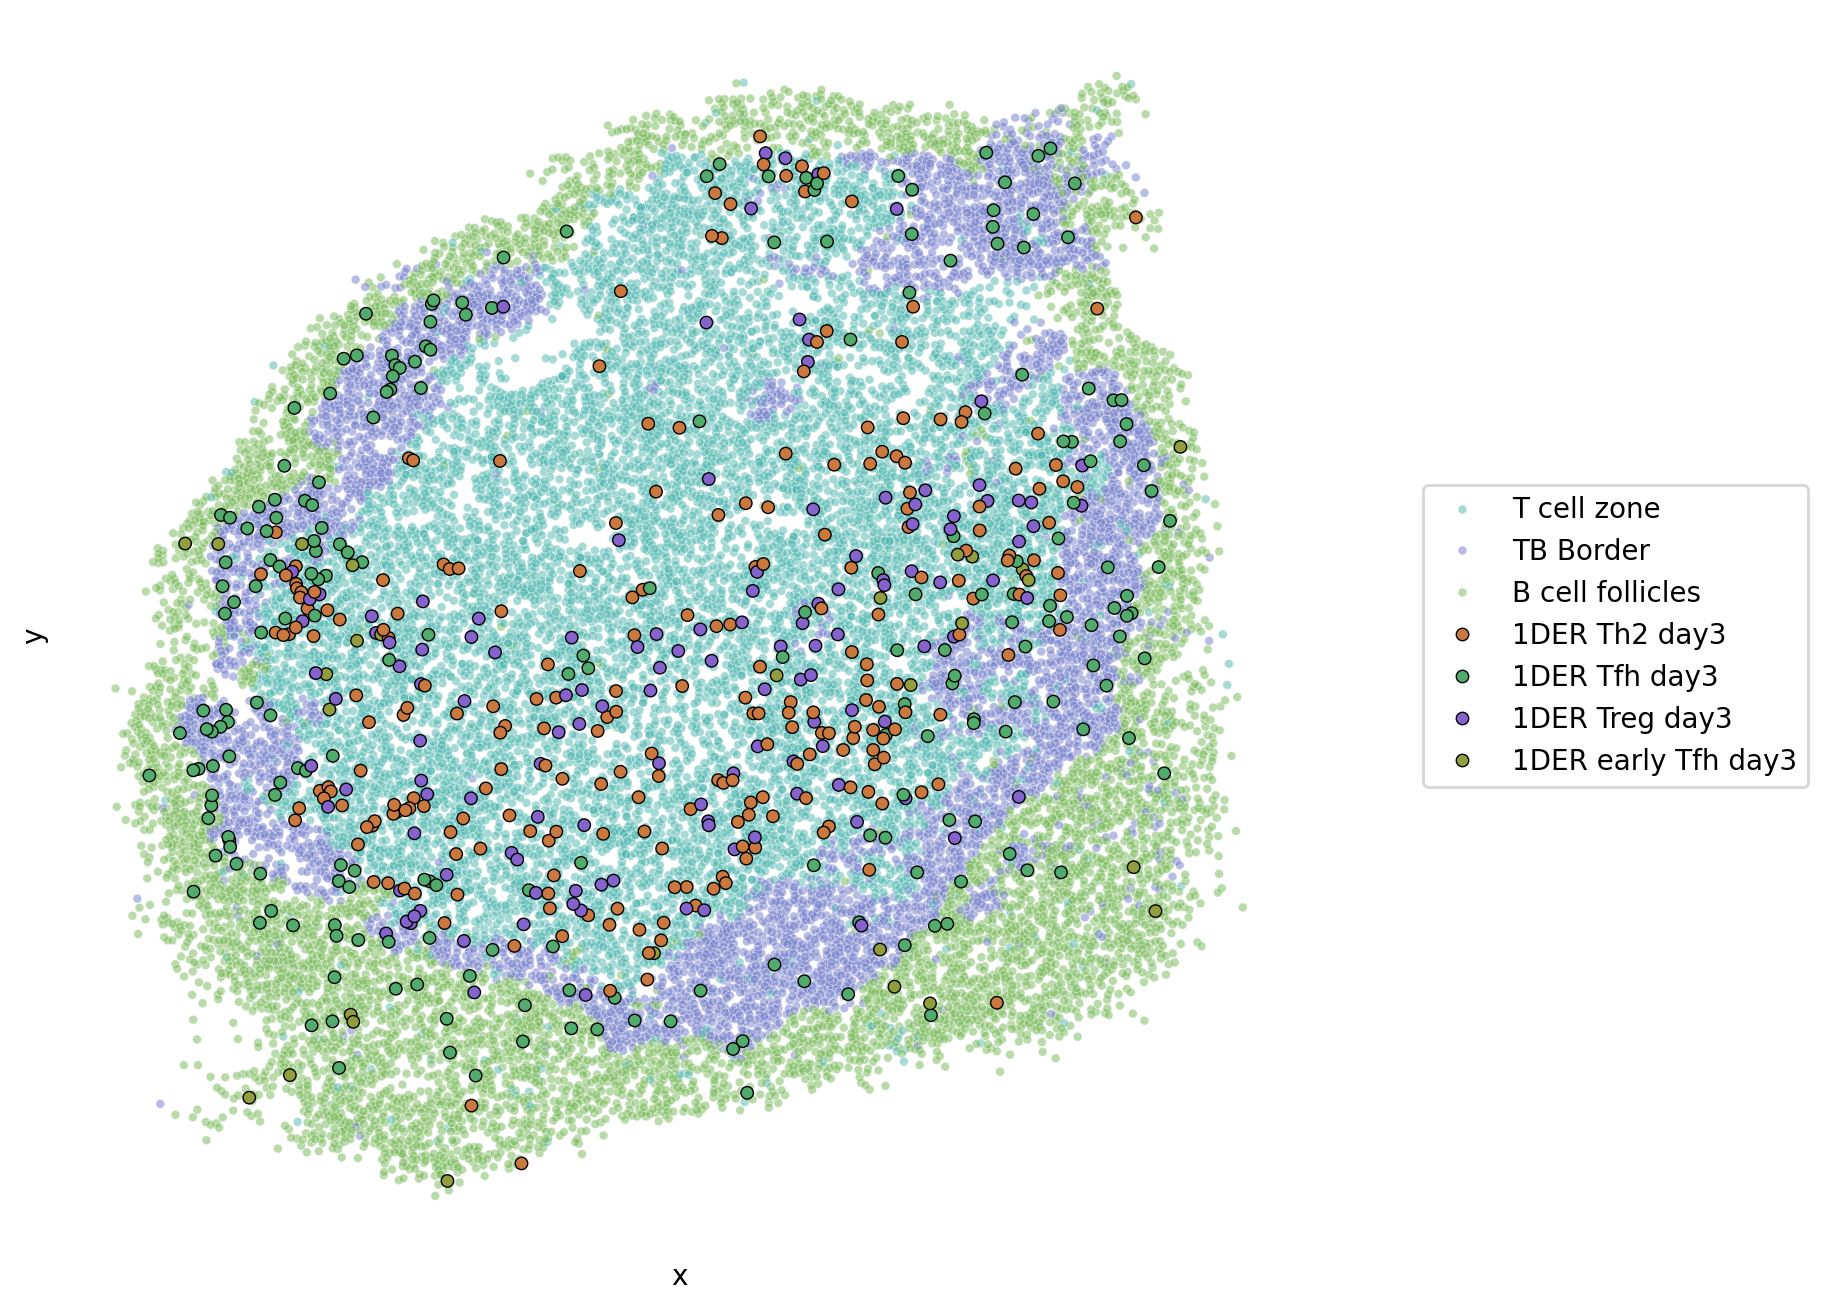

In [23]:
data = pd.concat(
        [pd.DataFrame(adata.obsm['spatial'], index=adata.obs_names, columns=['x', 'y']), 
        adata.obs], 
    axis=1)

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=data,
    x='x', y='y',
    hue='banksy_cluster',
    palette=color_dict,
    alpha=0.5,
    s=10,
    ax=ax,
)

sns.scatterplot(
    data=data.loc[transferred],
    x='x', y='y',
    hue='1DER_cell_type',
    alpha=1, 
    edgecolor='black',
    palette=color_dict,
    linewidth=0.5,
    s=20,
    ax=ax,
)

ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

handles, labels = ax.get_legend_handles_labels()
unique_banksy = data['banksy_cluster'].unique()
unique_1der = data.loc[transferred, '1DER_cell_type'].unique()

# Filter legend handles and labels to only include categories present in the data
filtered_handles = []
filtered_labels = []
for handle, label in zip(handles, labels):
    if label in unique_banksy or label in unique_1der:
        filtered_handles.append(handle)
        filtered_labels.append(label)

ax.legend(filtered_handles, filtered_labels, loc='center left', bbox_to_anchor=(1.1, 0.5), borderaxespad=0)
plt.savefig('figures/mouse_lymph_slideseq_1DER_locations.svg', dpi=300, bbox_inches='tight', transparent=True, format='svg')
plt.show()

In [24]:
from spaceoracle.plotting.cartography import Cartography

chart = Cartography(
    adata[transferred], 
    color_dict=color_dict)

gene_mtx = adata.to_df(layer='imputed_count')
delta_X = simulated_gex - gene_mtx
delta_X = delta_X.loc[transferred]

In [25]:
# sc.pp.pca(chart.adata)
# sc.pp.neighbors(chart.adata, use_rep='X_pca', n_neighbors=10)
# sc.tl.umap(chart.adata)

In [26]:
import gc
gc.collect()

137705

In [27]:
chart.adata.obs['1DER_cell_type'].value_counts()

1DER_cell_type
1DER Th2 day3          242
1DER Tfh day3          229
1DER Treg day3         131
1DER early Tfh day3     28
Name: count, dtype: int64

In [28]:
P = chart.compute_transition_probabilities(
    delta_X.values, 
    embedding=chart.adata.obsm['X_umap'],
    n_neighbors=250
)

In [29]:
# can't start vars with numbers bc something inside chart is probably using .query
chart.adata.obs['oneDER_cell_type'] = chart.adata.obs['1DER_cell_type'].copy()

if 'transition' in chart.adata.obs.columns:
    chart.adata.obs.drop(columns=['transition'], inplace=True)

chart.get_transition_annot(
    P,
    allowed_fates=chart.adata.obs['oneDER_cell_type'].unique(), 
    thresh=0, 
    annot="oneDER_cell_type"
)

source ct 1DER Th2 day3 Counter({'1DER early Tfh day3': 120, '1DER Treg day3': 96, '1DER Tfh day3': 17, '1DER Th2 day3': 9}) 0.0006281485214354643 6.570607460169714e-06
source ct 1DER Tfh day3 Counter({'1DER Tfh day3': 170, '1DER early Tfh day3': 43, '1DER Treg day3': 16}) 0.000849086354578897 6.287321618106744e-05
source ct 1DER Treg day3 Counter({'1DER Treg day3': 66, '1DER early Tfh day3': 56, '1DER Tfh day3': 9}) 0.0007419322776219215 4.857835457278493e-05
source ct 1DER early Tfh day3 Counter({'1DER Tfh day3': 14, '1DER early Tfh day3': 11, '1DER Treg day3': 3}) 0.0008696507172461912 0.00028454194181045257


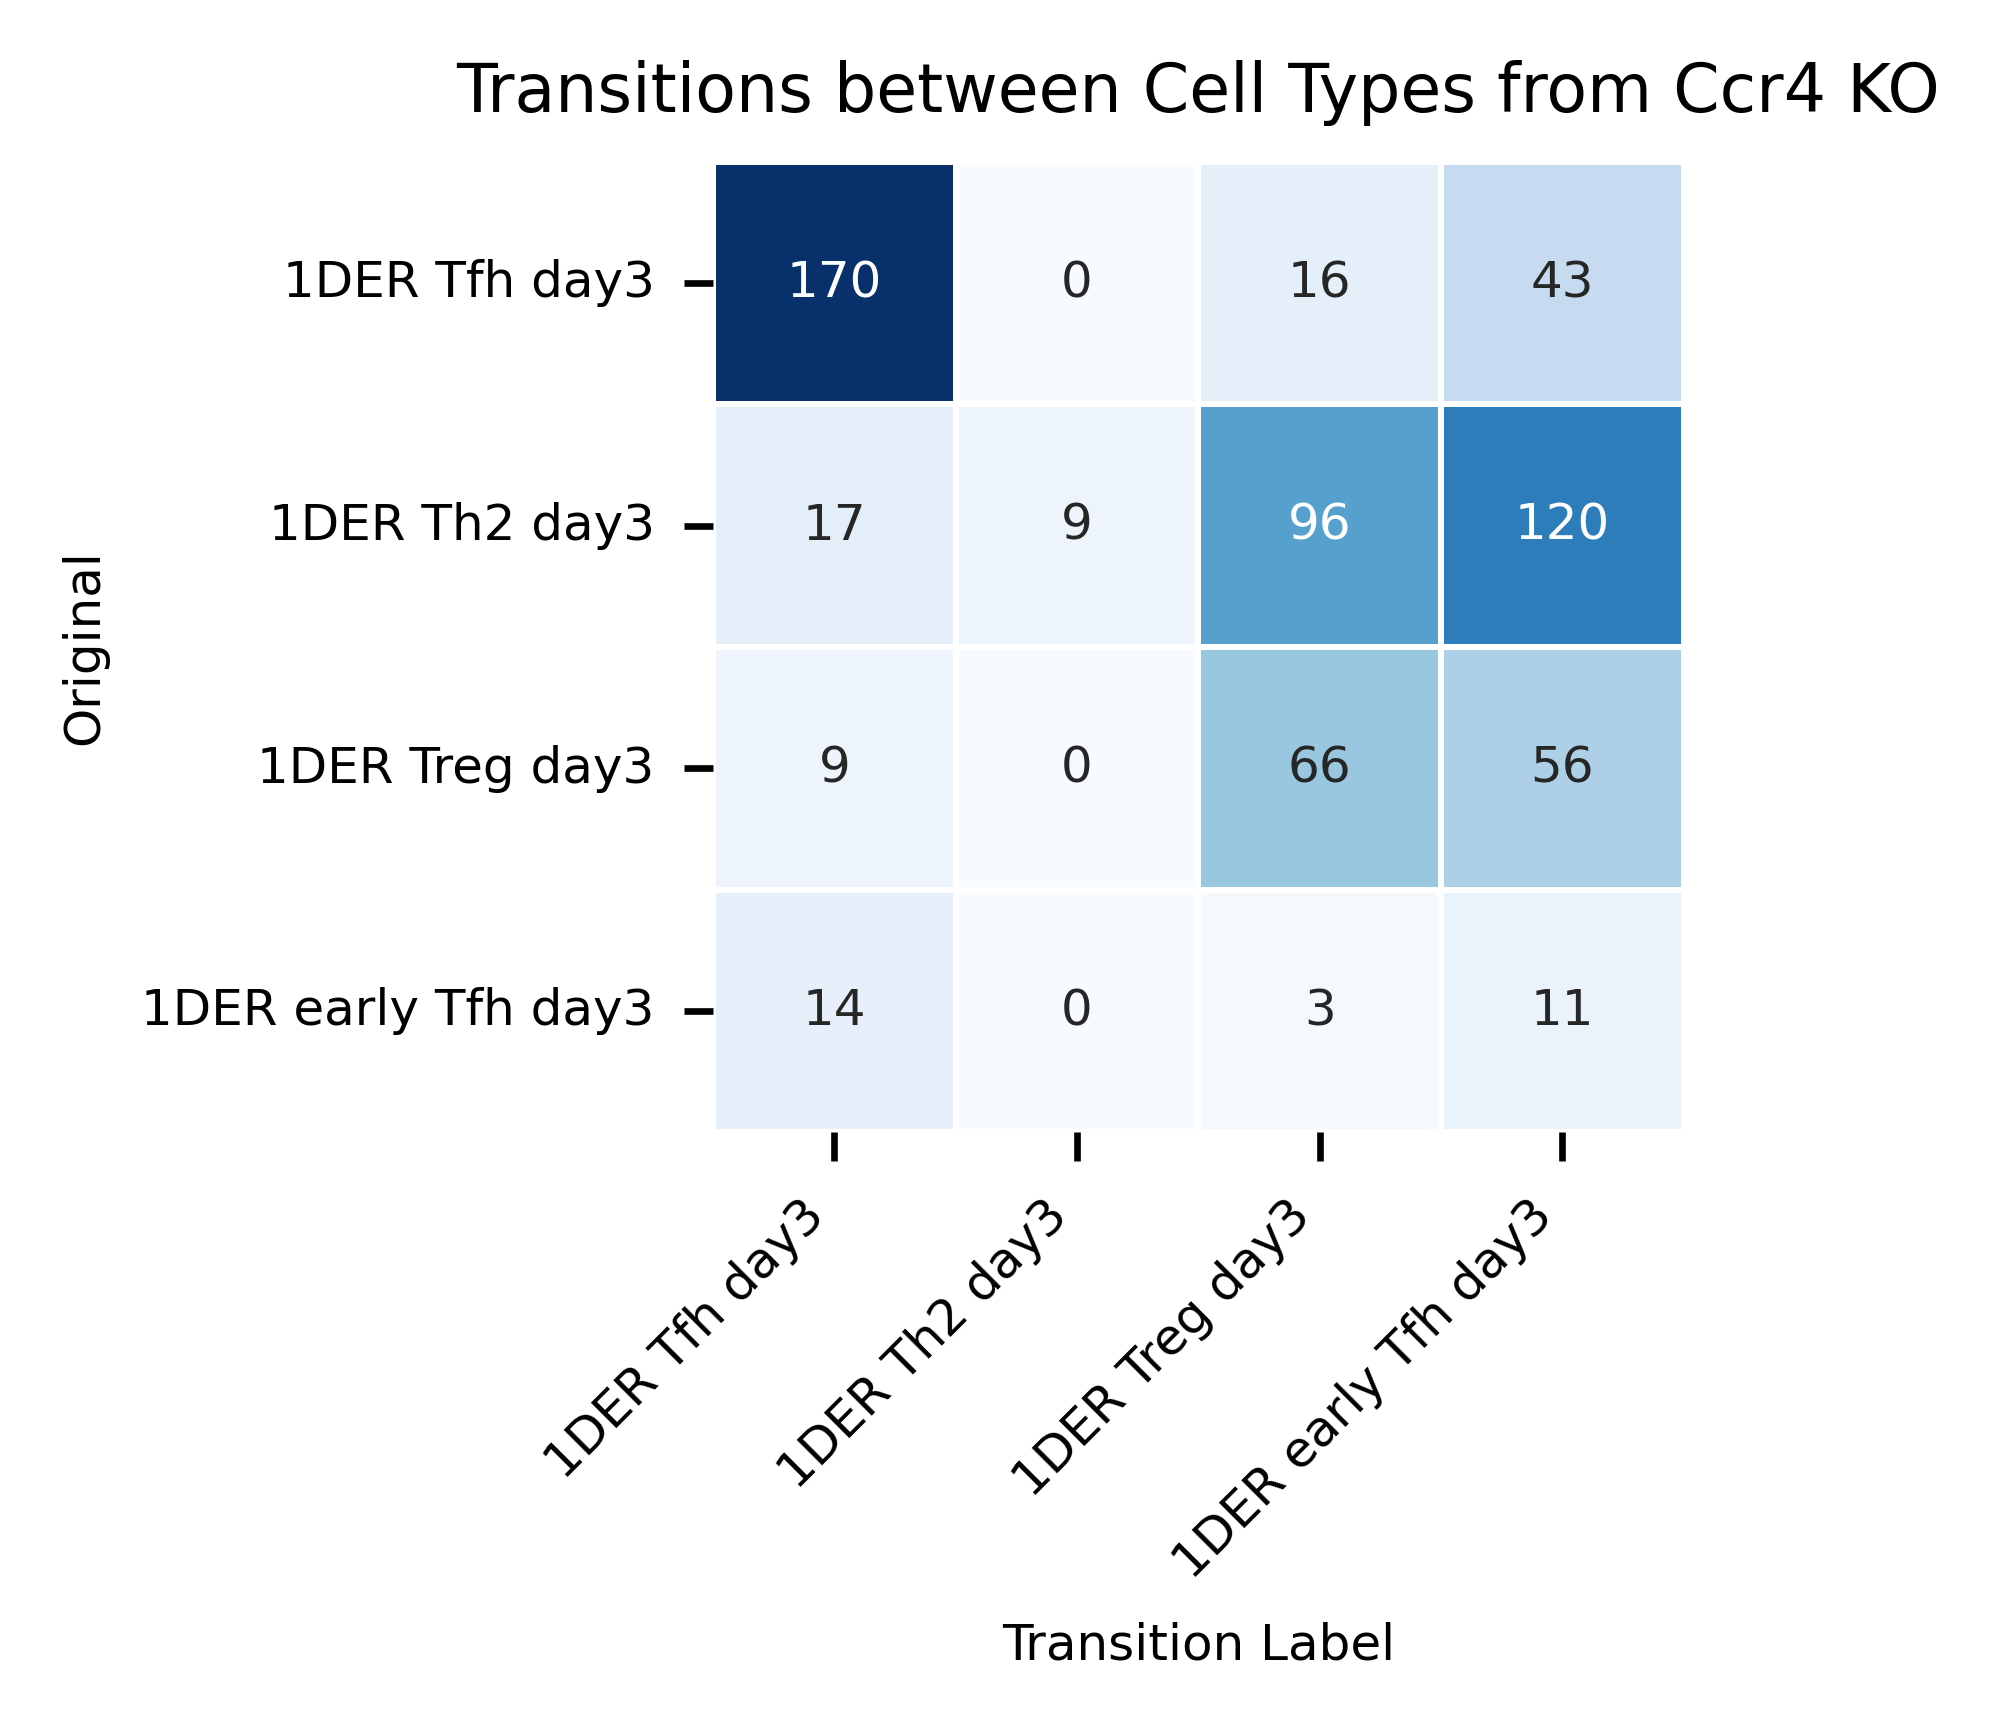

In [30]:
df = chart.adata.obs[['1DER_cell_type', 'transition']].copy()
counts = df.groupby(['1DER_cell_type', 'transition']).size().unstack(fill_value=0)

plt.figure(figsize=(3,3), dpi=300)

if counts.empty:
    counts = pd.DataFrame(0, index=counts.index, columns=counts.columns)
elif len(counts.index) != len(counts.columns):
    # Add missing rows/columns with zeros
    all_labels = sorted(set(counts.index) | set(counts.columns))
    counts = counts.reindex(index=all_labels, columns=all_labels, fill_value=0)

counts = counts.loc[np.unique([x for x in counts.index]).astype(str)] 

sns.heatmap(
    counts,
    annot=True,
    fmt='d',  
    cmap='Blues',
    linewidths=0.5,
    linecolor='white',
    cbar=False,
    square=True,
    annot_kws={"size": 6}
)

plt.title(f"Transitions between Cell Types from Ccr4 KO", fontsize=8)
plt.xlabel("Transition Label", fontsize=6)
plt.ylabel("Original", fontsize=6)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.yticks(rotation=0, fontsize=6)

plt.tight_layout()
plt.savefig(f'figures/mouse_lymph_slideseq_Ccr4KO_celltype_transitions_1DER.svg', format='svg', bbox_inches='tight', transparent=True)
plt.show()

In [31]:
chart = Cartography(adata[adata.obs['1DER_cell_type'] == '1DER Th2 day3'], color_dict=color_dict)
chart.adata.n_obs 

242

In [32]:
chart = Cartography(adata[adata.obs['1DER_cell_type'] == '1DER Th2 day3'], color_dict=color_dict)

gene_mtx = adata.to_df(layer='imputed_count')
delta_X = simulated_gex - gene_mtx

gene_mtx = gene_mtx.loc[chart.adata.obs.index]
delta_X = delta_X.loc[chart.adata.obs.index]

P = chart.compute_transition_probabilities(
    delta_X, 
    embedding=chart.adata.obsm['X_umap'],
    n_neighbors=240
)

chart.get_transition_annot(
    P,
    allowed_fates=chart.adata.obs['banksy_cluster'].unique(), 
    thresh=0, 
    annot='banksy_cluster'
)

source ct B cell follicles Counter({'B cell follicles': 6}) 0.003498192932438767 0.0034771463152430105
source ct T cell zone Counter({'B cell follicles': 136, 'TB Border': 92, 'T cell zone': 5}) 0.002794652301622793 0.001292824086642446
source ct TB Border Counter({'B cell follicles': 2, 'TB Border': 1}) 0.00419978977955108 0.0013916324200439376


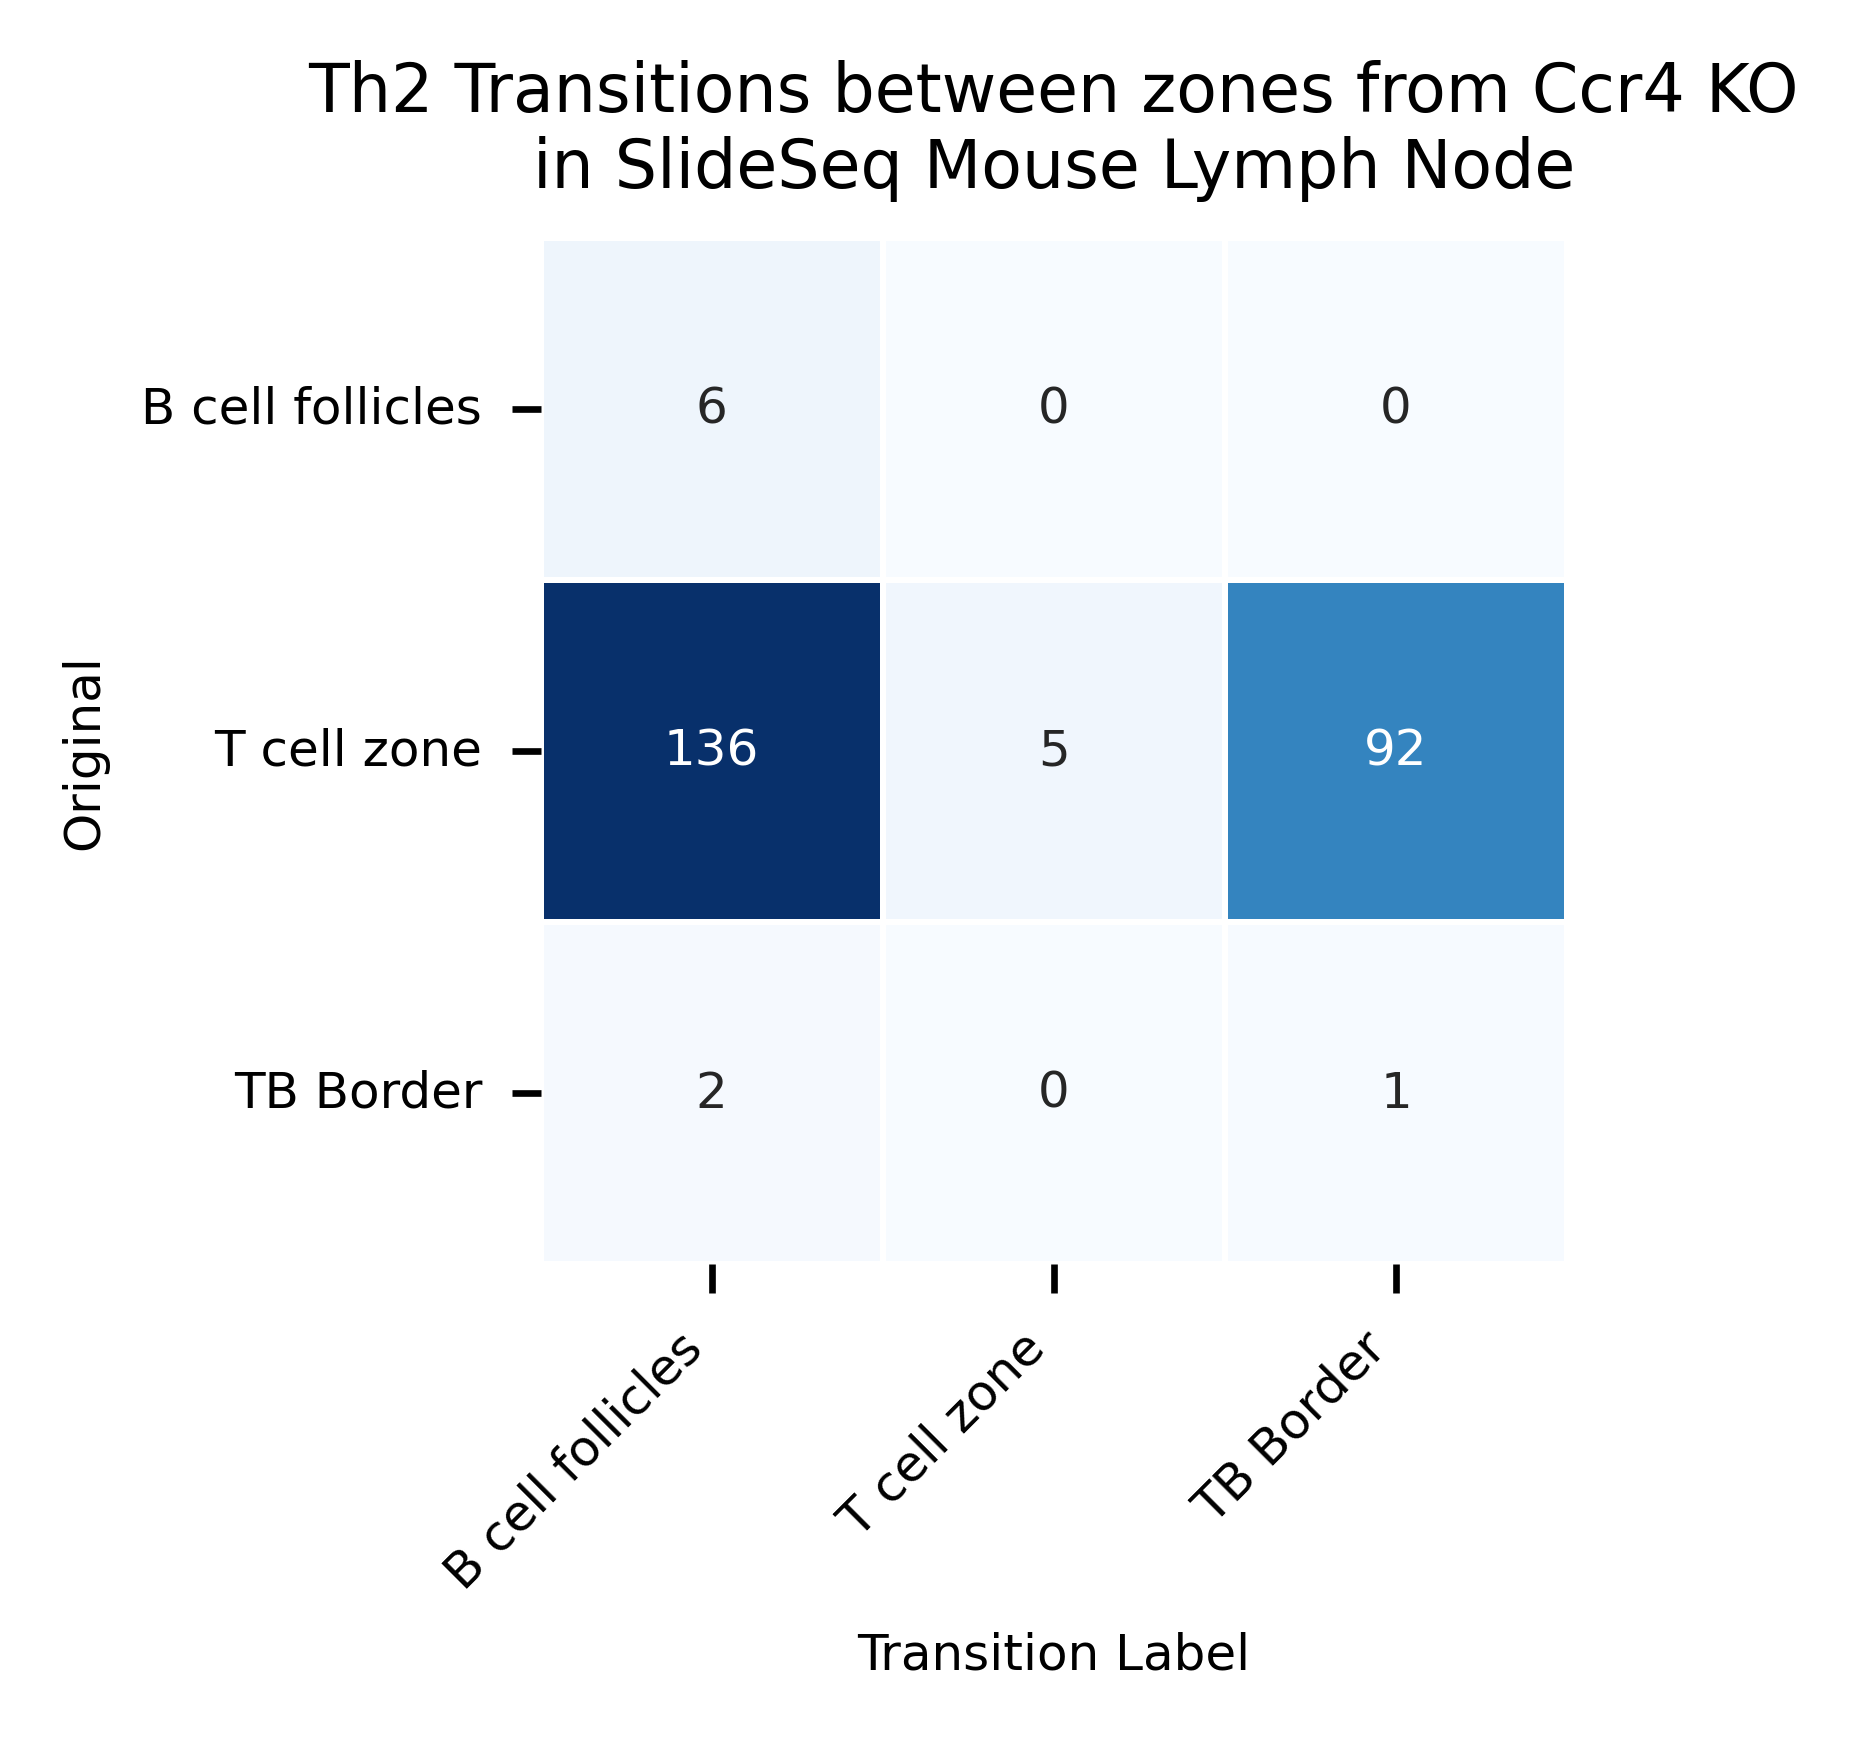

In [33]:
df = chart.adata.obs[['banksy_cluster', 'transition']].copy()
counts = df.groupby(['banksy_cluster', 'transition']).size().unstack(fill_value=0)

plt.figure(figsize=(3,3), dpi=300)

if counts.empty:
    counts = pd.DataFrame(0, index=counts.index, columns=counts.columns)
elif len(counts.index) != len(counts.columns):
    # Add missing rows/columns with zeros
    all_labels = sorted(set(counts.index) | set(counts.columns))
    counts = counts.reindex(index=all_labels, columns=all_labels, fill_value=0)

# Remove the line that tries to convert string labels to int, which causes the ValueError
# Instead, just sort the index and columns as strings for display
counts = counts.reindex(index=sorted(counts.index, key=str), columns=sorted(counts.columns, key=str), fill_value=0)

sns.heatmap(
    counts,
    annot=True,
    fmt='d',  
    cmap='Blues',
    linewidths=0.5,
    linecolor='white',
    cbar=False,
    square=True,
    annot_kws={"size": 6}
)

plt.title(f"Th2 Transitions between zones from Ccr4 KO\nin Day 3SlideSeq Mouse Lymph Node", fontsize=8)
plt.xlabel("Transition Label", fontsize=6)
plt.ylabel("Original", fontsize=6)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.yticks(rotation=0, fontsize=6)

plt.tight_layout()
plt.savefig(f'figures/mouse_lymph_slideseq_Ccr4KO_banksy_transitions_1DER.svg', format='svg', bbox_inches='tight', transparent=True)
plt.show()